PR-new-logo-orizontal (1).svg
# **Lab06PR. Metrici de evaluare și optimizarea modelelor**

* ### **La începutul laboratorului [descărcați arhiva de aici](https://drive.google.com/drive/folders/18Vm3WvsBOEC3Cm6SYn8uFtCXhk9y3WXU?usp=sharing) urmând să dați upload la fișiere în google colaboratory:**

  * **diabetes.csv**
  * **Dataset1.csv**
  * **Salary_Data.csv**
  * **Position_Salaries.csv**
  * **Social_Network_Ads.csv**
  * **wine (1).data**
  * **insurance.csv**

* **În laboratorul trecut au fost prezentate modelele de bază din Machine Learning și cum alegem modelul în funcție de date și de ce problemă dorim să rezolvăm. În acest laborator vom măsura și îmbunătăți performanța modelelor optimizând hyperparametrii acestora.**

* **Scopul acestui laborator este familiarizarea cu metricile de evaluare și cu tehnicile de optimizare a modelelor.**






# **Cuprins**

I.   **Workflow**

II.   **Concepte cheie în evaluarea modelelor de ML**
  * Overfit & Undefit
  * Bias & Variance
  * MAE & MSE (pentru regresie)
  * Precision & Accuracy (pt clasificare)

III.  **Metrici de evaluare a modelelor**
  * Acuratețe
  * Precizie
  * Recall
  * Confusion Matrix
  * False Positive & False Negative
  * F1 score
  * AUC
  * ROC
  * ${R^2}$

IV. **Tehnici de optimizare a modelelor**
  * Train-Validation-Test split
  * Cross validation
  * K-Fold Cross validation
  * Data leakage discussion
  * Grid search

V. **Optimizarea modele cunoscute**
  * Învățare Supervizată
    * Regresie
    * Clasificare
  * Învățare Nesupervizată
    * Clusterizare

VI.  **Exerciții**

# **I. Workflow**

### Care sunt pașii pentru optimizarea unui model de învățare automată?

1. **Identificarea hyperparametrilor modelului.**

2. **Construirea unei liste cu valori posibile pentru aceștia.**

3. **Antrenarea și testarea modelului pe setul de validare.**

4. **Observarea modificărilor metricilor în funcție de hyperparametrii aleși.**

5. **Dacă rezultatul este satisfăcator, valorile optime ale hyerparametrilor au fost gasiți. Altfel, micșorează domeniul de valori posibile și mergi la 2.**

# **II. Concepte cheie în evaluarea modelelor de ML**

### **1 Overfit & Underfit**

**Underfit**:
* Se spune că un model statistic sau un algoritm de învățare automată are o insuficiență atunci când nu poate surprinde tendința de bază a datelor.  Underfittingul distruge acuratețea modelului nostru de învățare automată. Apariția sa înseamnă pur și simplu că modelul nostru sau algoritmul nu se potrivesc suficient de bine cu datele. De obicei, se întâmplă atunci când avem mai puține date pentru a construi un model precis și, de asemenea, atunci când încercăm să construim un model liniar cu mai puține date neliniare. În astfel de cazuri, regulile modelului de învățare automată sunt prea ușoare și flexibile pentru a fi aplicate pe astfel de date minime și, prin urmare, modelul va face probabil multe predicții greșite. Underfittingul poate fi evitat prin utilizarea mai multor date și, de asemenea, reducerea caracteristicilor prin selectarea caracteristicilor.

* **Pe scurt, Underfitting - High bias și low variance**


* **Tehnici de reducere a insuficienței:**
  1. Creșteți complexitatea modelului
  2. Măriți numărul de caracteristici
  3. Eliminați zgomotul din date.
  4. Măriți numărul de epoci sau creșteți durata antrenamentului pentru a obține rezultate mai bune.

**Overfit**:
* Se spune că un model statistic face overfitting atunci când îl antrenăm cu o mulțime de date. Când un model este instruit cu atât de multe date, începe să învețe din zgomotul și intrările de date inexacte din setul nostru de date. Apoi, modelul nu clasifică datele corect, din cauza prea multor detalii și zgomot. Cauzele overfittingului sunt metodele non-parametrice și neliniare, deoarece aceste tipuri de algoritmi de învățare automată au mai multă libertate în construirea modelului bazat pe setul de date și, prin urmare, pot construi cu adevărat modele nerealiste.

* O soluție pentru a evita overfittingul este utilizarea unui algoritm liniar dacă avem date liniare sau utilizarea parametrilor precum adâncimea maximă dacă folosim arbori de decizie.

* **Pe scurt, Overfitting - Low bias și high variance**

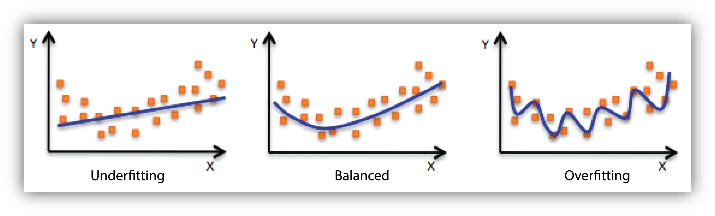

### **2 Bias & Variance**

**BIAS (Partinire)**

**Def**: Diferența dintre predicția medie a modelului și valoarea corectă pe care încercăm să o anticipăm. Modelul cu bias mare acordă foarte puțină atenție datelor de antrenament și simplifică prea mult modelul. Acesta duce întotdeauna la o eroare mare în datele de antrenament și de testare.

**VARIANCE**

**Def**: Variabilitatea predicției modelului pentru un anumit punct de date sau o valoare care ne spune răspândirea datelor. Modelul cu varianță mare acordă multă atenție datelor de antrenament și nu generalizează datele pe care nu le-a văzut până acum. Ca rezultat, astfel de modele au rezultate foarte bune pe datele de antrenament, dar au rate de eroare ridicate la datele de testare.



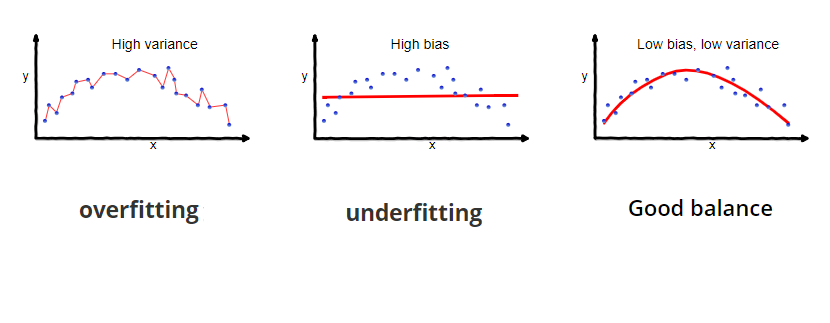

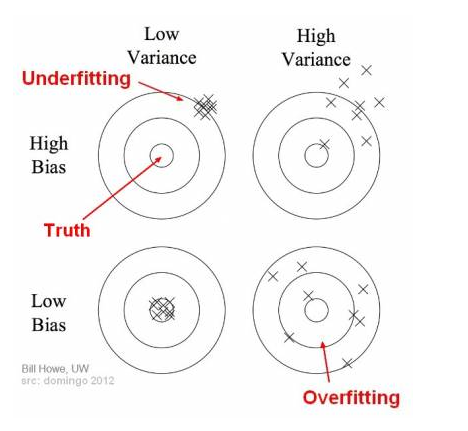

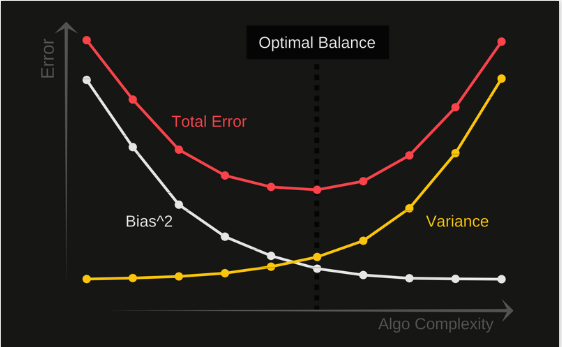

### **3. Errors**

**3.1 Mean Absolute Error**

* **Eroarea absolută medie** calculează diferența medie dintre valorile calculate și valorile reale. Este, de asemenea, cunoscută sub numele de precizie dependentă de scară, deoarece calculează eroarea în observațiile luate la aceeași scară. Este folosit ca măsurător de evaluare pentru modelele de regresie în învățarea automată. Acesta calculează erorile dintre valorile reale și valorile prezise de model. Este folosit pentru a prezice acuratețea modelului de învățare automată.

* **$MAE$** = ${\frac{1}{n} * {\sum_{i=1}^{n} (|y_{i} - y_{i}'|)}}$

### ***EXEMPLU***


In [ ]:
from sklearn import metrics

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(metrics.mean_absolute_error(y_true, y_pred))

In [ ]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(metrics.mean_absolute_error(y_true, y_pred))

**3.2 Mean Squared Error**

* **Mean Squared Error (MSE)** este destul de similar cu Mean Absolute Error, singura diferență fiind că MSE ia media pătratului diferenței dintre valorile inițiale și valorile prezise. Avantajul MSE este că este mai ușor de calculat gradientul, în timp ce Mean Absolute Error necesită instrumente complicate de programare liniară pentru a calcula gradientul. Pe măsură ce luăm pătratul erorii, efectul erorilor mai mari devine mai pronunțat decât al erorii mai mici, prin urmare modelul se poate concentra acum mai mult pe erorile mai mari.

* **$MSE$** = ${\frac{1}{n} * {\sum_{i=1}^{n} (y_{i} - y_{i}')^2}}$

### ***EXEMPLU***

In [ ]:
from sklearn import metrics

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(metrics.mean_squared_error(y_true, y_pred))

In [ ]:
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
print(metrics.mean_squared_error(y_true, y_pred))

### **4 Precision & Accuracy**

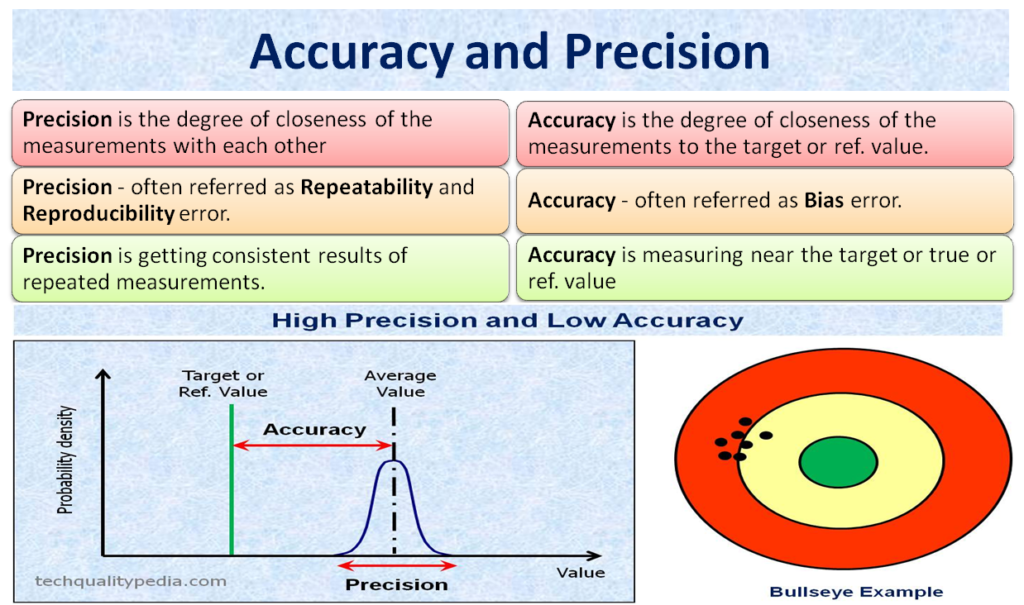

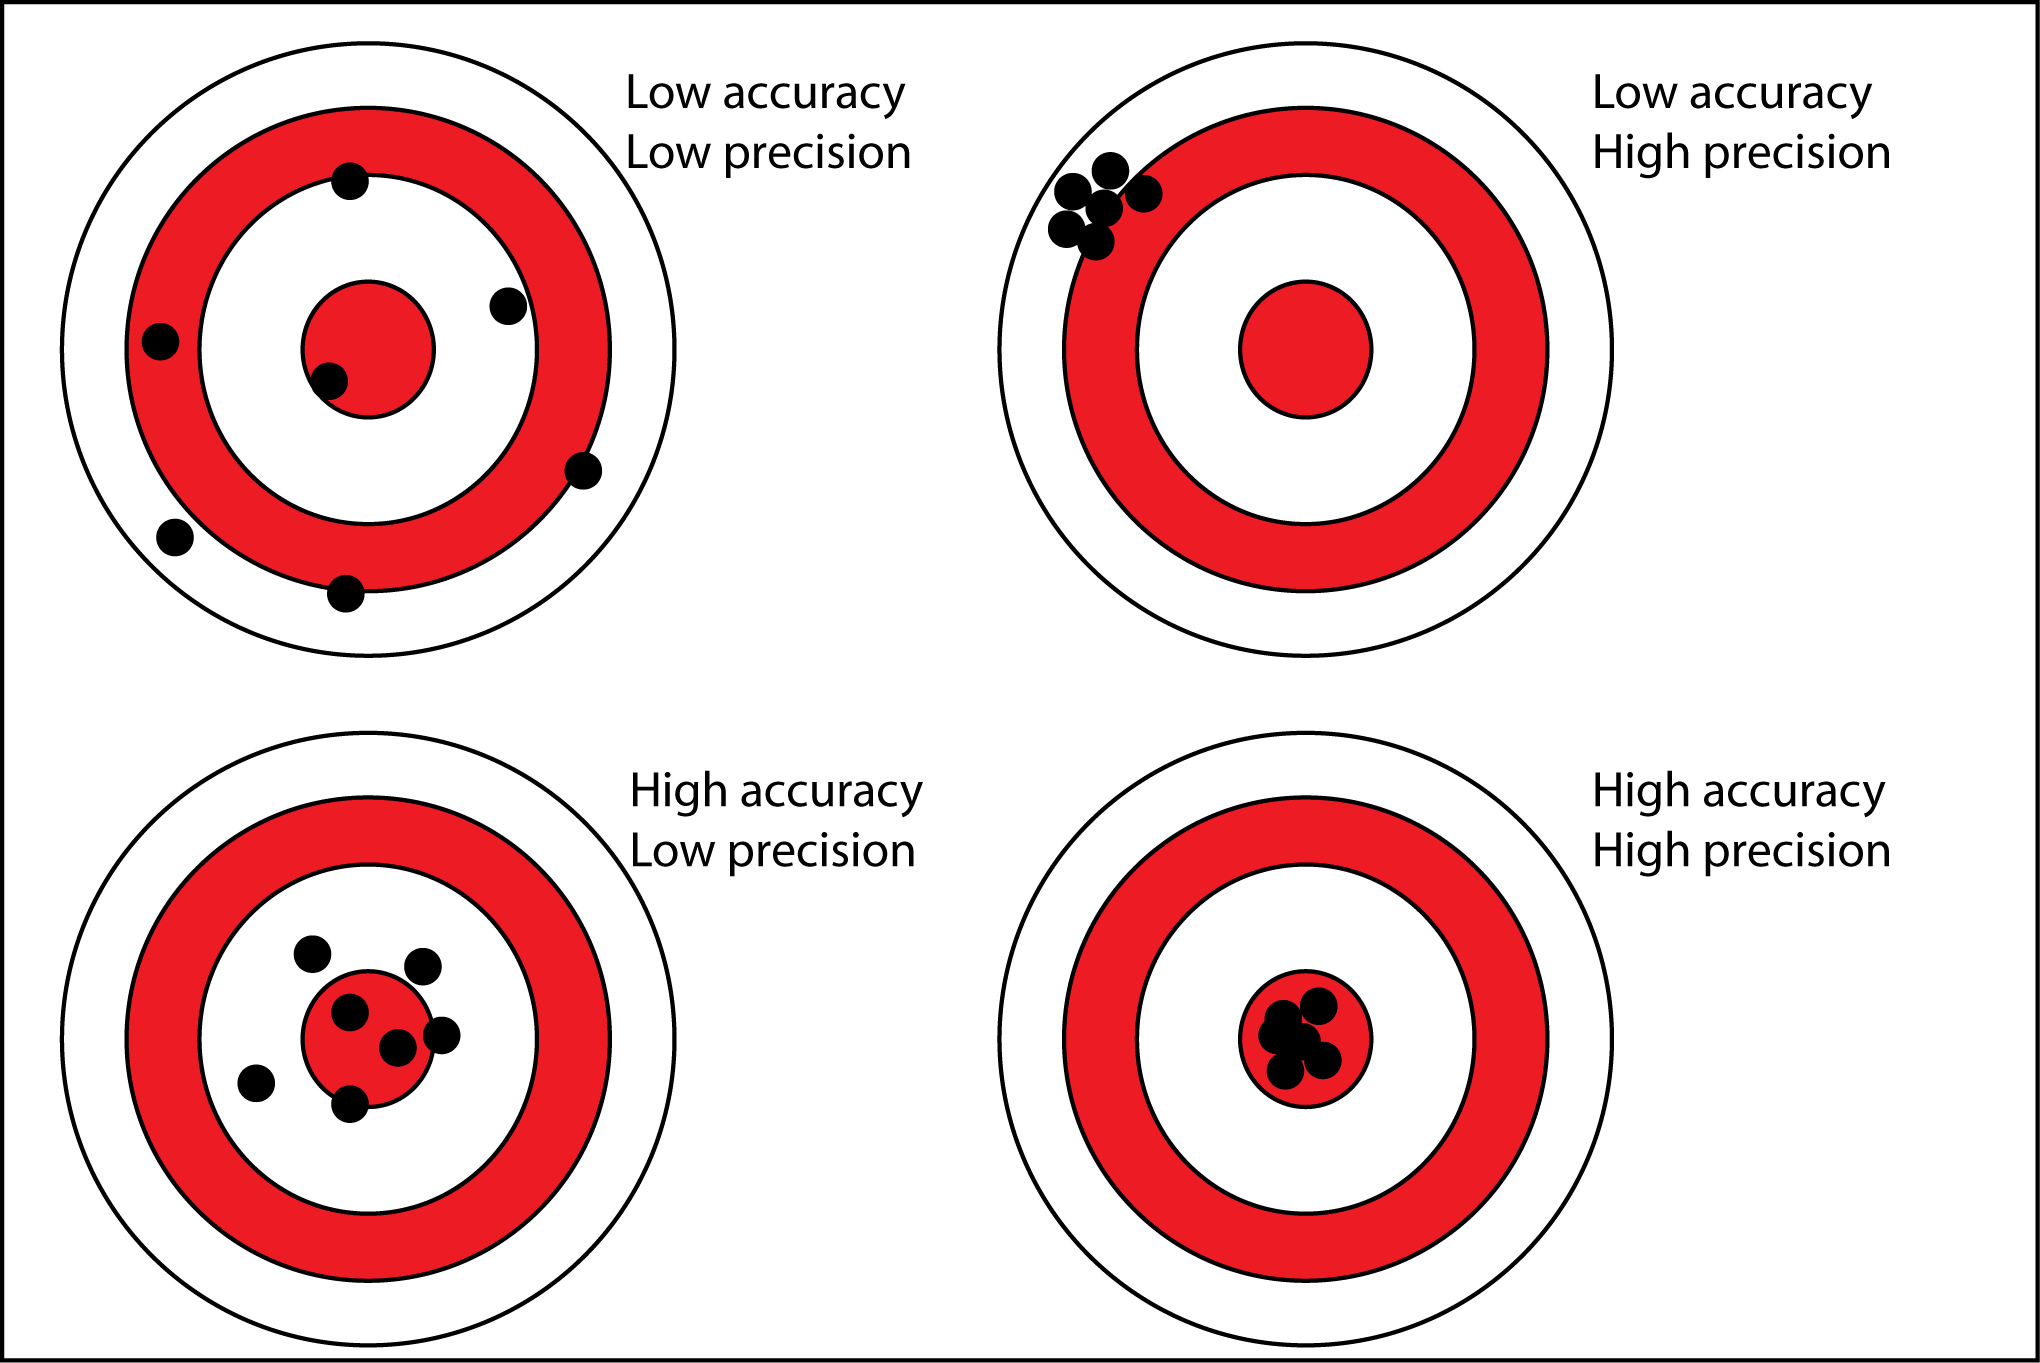

# **III. Metrici de evaluare a modelelor**

## **1. Evaluarea Regresiilor**

### **1.1 R-Squared ($R^2$)**

#### **Teorie**

* ${R^2}$ este o măsură statistică care reprezintă portivirea unui model de regresie. Valoarea ideală pentru ${R^2}$ este 1. Cu cât valoarea lui ${R^2}$ este mai aproape de 1, cu atât modelul este mai bine adaptat.


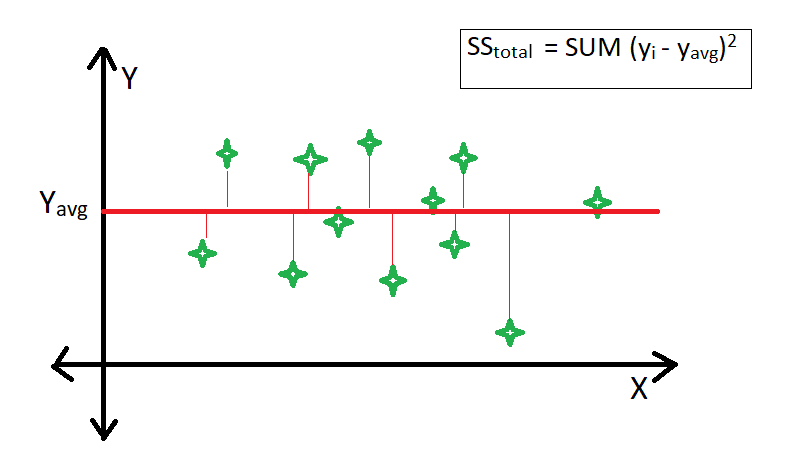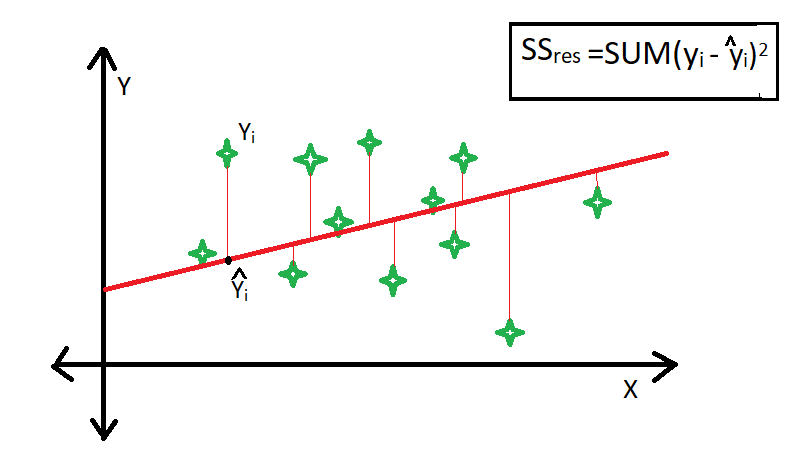



**DEF**: este o măsură statistică care reprezintă proporția varianței pentru o variabilă dependentă explicată de o variabilă independentă sau variabile dintr-un model de regresie.
 - $y_{avg}$ = media valorilor Y
 - $y_{i}$ = valoare reală
 - $y_{i}'$ = valoare prezisă
 -  **Sum of Squares of Residuals ($SS_{res}$)** = ${{\sum_{i=1}^{n} (y_{i} - y_{i}')^2}}$ -> **min**

 - **Sum of Total Squares ($SS_{tot}$)** = ${{\sum_{i=1}^{n} (y_{i} - y_{avg})^2}}$

 - **$R^2$** = 1 - $\frac{SS_{res}}{SS_{tot}}$

**OBS** : **$R^2$** ∈ [0, 1]

**OBS** : Cu cat **$R^2$** -> 1 cu atât mai bine.

**OBS**: Valoarea ${R^2}$ poate fi, de asemenea, negativă atunci când modelul antrenat este mai slab decât modelul mediu.

**OBS**: Limitarea utilizării metodei ${R^2}$:

* Valoarea lui ${R^2}$ crește întotdeauna sau rămâne aceeași pe măsură ce noi variabile sunt adăugate la model, fără a detecta semnificația acestei variabile nou adăugate (adică valoarea ${R^2}$ nu scade niciodată la adăugarea de noi atribute la model). Ca rezultat, la model pot fi adăugate și atribute nesemnificative cu o creștere a valorii ${R^2}$.

* Acest lucru se datorează faptului că $SS_{tot}$ este întotdeauna constant și modelul de regresie încearcă să scadă valoarea $SS_{res}$ prin găsirea unei corelații cu acest nou atribut, de unde crește valoarea totală a ${R^2}$, ceea ce poate duce la un model de regresie slab.

#### **EXEMPLU**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston

X = load_boston()['data'].copy()
y = load_boston()['target'].copy()

linear_regression = LinearRegression()
linear_regression.fit(X,y)

prediction = linear_regression.predict(X)

def my_r2_score(y_true, y_hat):
    y_bar = np.mean(y_true)
    ss_total = np.sum((y_true - y_bar) ** 2)
    ss_explained = np.sum((y_hat - y_bar) ** 2)
    ss_residual = np.sum((y_true - y_hat) ** 2)
    scikit_r2 = r2_score(y_true, y_hat)
    
    print(f'R-squared (SS_explained / SS_Total) = {ss_explained / ss_total}\n' + \
          f'R-squared (1 - (SS_residual / SS_Total)) = {1 - (ss_residual / ss_total)}\n'+ \
          f"Scikit-Learn's R-squared = {scikit_r2}")

print('Positive R-squared\n')
my_r2_score(y, prediction)

print('\n\nNegative R-squared\n')
my_r2_score(y, np.zeros(len(y)))

print("-----------------")

**1.2 Adjusted R-Squared ($Adj R^2$)**


#### **Teorie**

* **${R^2}$** este utilizat pentru a determina potrivirea în analiza de regresie. Potrivirea implică cât de bine este adaptat modelul de regresie la punctele de date. Cu cat este valoarea ${R^2}$ aproape de 1, mai bun este modelul. Dar problema constă în faptul că valoarea ${R^2}$ crește întotdeauna pe măsură ce noi variabile (atribute) sunt adăugate la model, indiferent dacă atributele nou adăugate au sau nu un impact pozitiv asupra modelului. De asemenea, poate duce la overfitting-ul modelului dacă există numar mare a variabilelor.

* $Adj R^2$ este o formă modificată de $R^2$ a cărei valoare crește dacă noii predictori tind să îmbunătățească performanța modelului și scade dacă noii predictori nu îmbunătățesc performanța conform așteptărilor.


**DEF**: $Adj R^2$ este o versiune modificată a $R^2$ care a fost ajustată pentru numărul de predictori din model. $Adj R^2$ crește atunci când noul termen îmbunătățește modelul mai mult decât s-ar fi așteptat. Scade atunci când un predictor îmbunătățește modelul cu mai puțin decât se aștepta.

 - **$Adj R^2$** = 1 - (1-$R^2$) * $\frac{n - 1}{n - p -1}$
 - p = numarul de regresoare (variabile independente)
 - n = numarul total de feature-uri dintr-un sample

**OBS** : Daca p **crește** => $R^2$ **crește**

**OBS** : Daca p **crește** => $Adj R^2$ **scade**

**OBS** : Verifică în timp ce crești numărul de feature-uri în model daca ajută sau nu la performanță.

#### **EXEMPLU**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.feature_selection import mutual_info_regression

df = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])
df['y'] = load_boston()['target']

print(df)

df['RAD'] = df['RAD'].astype('int')
df['CHAS'] = df['CHAS'].astype('int')

X = df.drop(columns='y').copy()
y = df['y'].copy()

np.random.seed(11)
X['random1'] = np.random.randn(len(X))
X['random2'] = np.random.randint(len(X))
X['random3'] = np.random.normal(len(X))

## LSTAT are o relatie stransa cu cu target value
mutual_info = mutual_info_regression(X, y, discrete_features=X.dtypes == np.int32)
mutual_info = pd.Series(mutual_info, index=X.columns)
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

In [ ]:
result_df = pd.DataFrame()
for i in range(1, len(mutual_info) + 1):
    X_new = X.iloc[:, :i].copy()
    linear_regression = LinearRegression()
    linear_regression.fit(X_new, y)
    
    prediction = linear_regression.predict(X_new)
    r2 = r2_score(y_true=y, y_pred=prediction)
    adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - i - 1))
    
    result_df = result_df.append(pd.DataFrame({'r2': r2,
                                              'adj_r2': adj_r2}, index=[i]))

result_df

## **2.Evaluarea rezultatelor clasificării**

### **2.1. Confusion Matrix**




#### **Teorie**


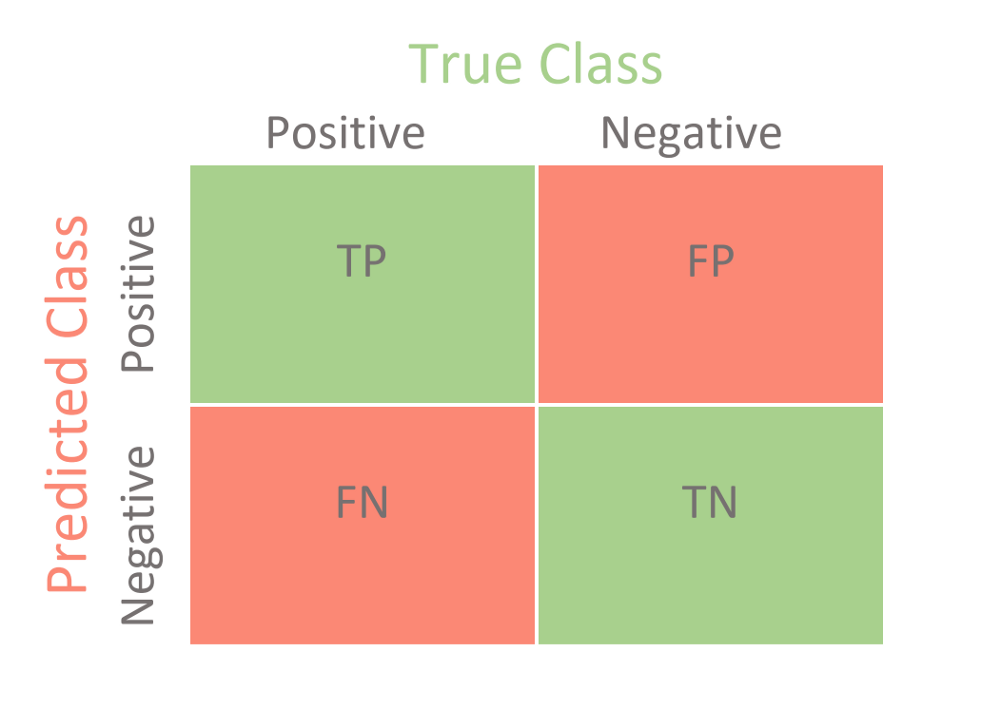

* **TP (True Positive)**  - Valoarea prezisă este pozitivă și valoarea reală este pozitivă.

* **TN (True Negative)**  - Valoarea prezisă este negativă și valoarea reală este negativă.

* **FP (False Positive)** **(Type 1 Error)** - Valoarea prezisă este pozitivă și valoarea reală este negativă

* **FN (False Negative)** **(Type 2 Error)** - Valoarea prezisă este negative și valoarea reală este pozitiva



* **Accuracy (Exactitate)** - este apropierea măsurătorilor de o anumită valoare.

  - **Accuracy** = $\frac{TN + TP}{TN + TP + FP + FN}$

* **Precision (Precizie)** - este apropierea măsurătorilor între ele.

  - **Precision** = $\frac{TP}{TP + FP}$

* **Recall** - este fracțiunea de instanțe relevante care au fost recuperate. (este de asemenea cunoscut ca: **True Positive Rate(TPR)**, **Sensitivity**, **Probability of detection** )

* **Recall** ajută să măsurăm capacitatea de a clasifica probe pozitive în model. Ne ajută să măsurăm câte probe pozitive au fost clasificate corect de modelul ML. Atunci când calculăm Precizia unui model, ar trebui să luăm în considerare atât eșantioanele pozitive, cât și cele negative care sunt clasificate.

  - **Recall** = $\frac{TP}{TP + FN}$

* **False positive rate (FPR)** (este de asemenea cunoscut ca: **Specificity**)

  - **Specificity** = $\frac{FP}{FP + TN}$
 






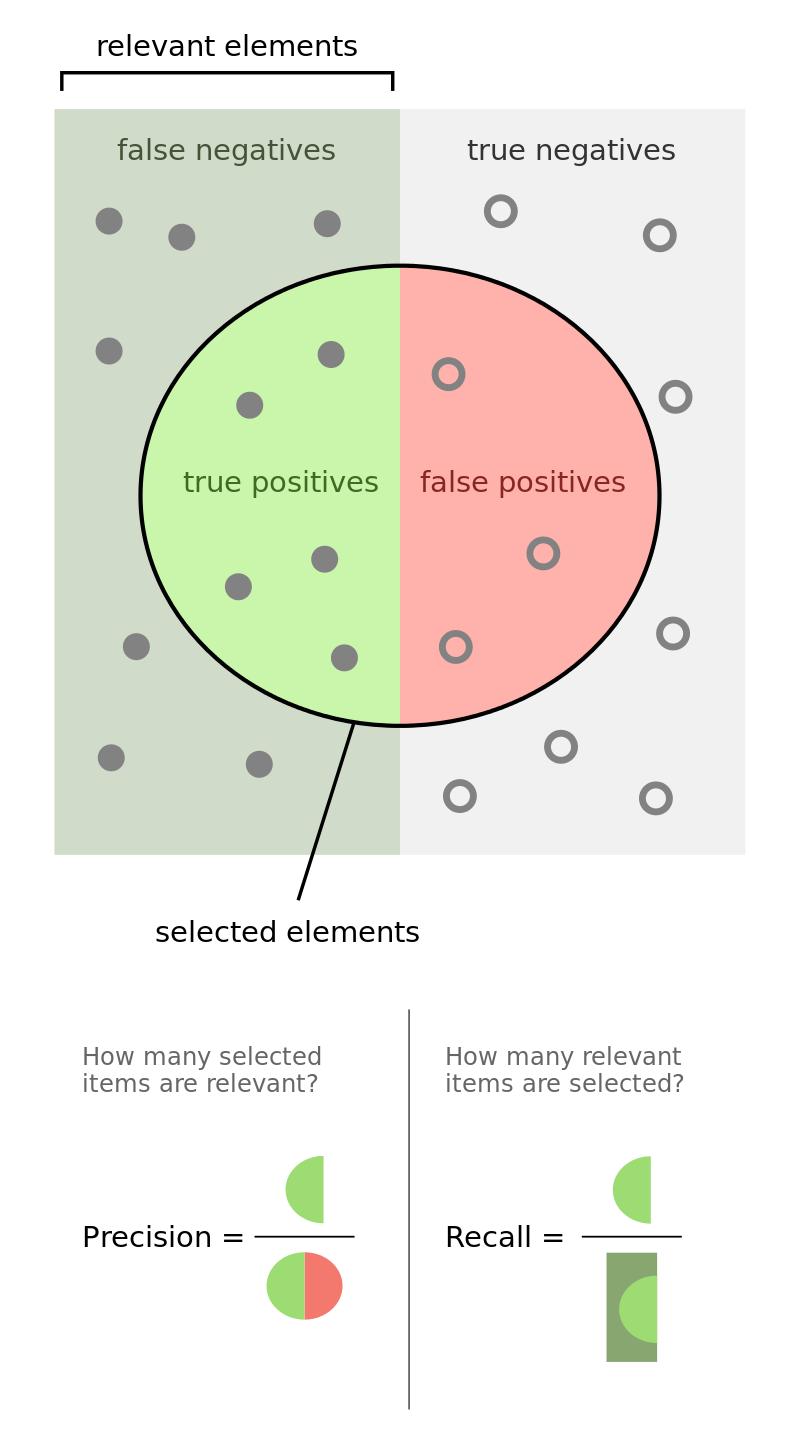

#### **EXEMPLU**

In [ ]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)


# Crearea unui set de date cu clase binare dezechilibrate:
# Clasa negativă (0) este „nu cifra 1”
# Clasa pozitivă (1) este „cifra 1”

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)


print("------------------")
print(X_train)
print("------------------")
print(X_test)
print("------------------")
print(y_train)
print("------------------")
print(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Cea mai frecventa clasa (dummy classifier)\n', confusion)

dummy_class_score = dummy_majority.score(X_test, y_test)

print('Score (dummy classifier)\n', dummy_class_score)


In [ ]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Predicție aleatorie proporțională cu clasa (dummy classifier)\n', confusion)

dummy_class_score = dummy_classprop.score(X_test, y_test)

print('Score (dummy classifier)\n', dummy_class_score)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Clasificator support vector machine (kernel linear, C=1)\n', confusion)

svm_score = svm.score(X_test, y_test)

print('Score (SVM)\n', svm_score)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Clasificator Regresor Logistic (default settings)\n', confusion)

regresor_score = lr.score(X_test, y_test)

print('Score (Logistic Regressiom)\n', regresor_score)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Clasificator decision tree (max_depth = 2)\n', confusion)

decisionTree_score = dt.score(X_test, y_test)

print('Score (Decision Tree)\n', decisionTree_score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=3).fit(X_train, y_train)
random_forest_predicted = rf.predict(X_test)
confusion = confusion_matrix(y_test, random_forest_predicted)

print('Clasificator Random Forest (max_depth = 3)\n', confusion)

randomForest_score = rf.score(X_test, y_test)

print('Score (Random Forest)\n', randomForest_score)

#### **Există adesea un compromis între Precision și Recall**




  * **Sarcini de ML orientate către Recall**:

    - Căutarea și extragerea informațiilor în descoperirea legală

    - Detectarea tumorii

    - Adesea asociat cu un expert uman pentru a elimina **falsurile pozitive**

  * **Sarcini de ML orientate spre Precision**:

    - Clasarea motorului de căutare, sugestie de interogare

    - Clasificarea documentelor

    - Multe sarcini orientate către clienți (utilizatorii își amintesc eșecurile!)

* **Precision-Recall Curves**

    **X-axis: Precision**

    **Y-axis: Recall**

    Colțul din dreapta-sus:
    * Punctul „ideal”
    * Precizie = 1.0
    * Recall = 1.0

    "Abruptitatea” curbelor P-R este importantă:
    * Maximizați precizia în timp ce maximizați recall-ul

#### **EXEMPLU**

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# decision_function()
# Predict confidence scores for samples.
# The confidence score for a sample is proportional to the signed distance of that sample to the hyperplane.

y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### **2.2. F1 Score**


#### **Teorie**

* **F1-score** este media armonică dintre **precizie** și **recall**. Intervalul pentru **F1-score** este [0, 1]. Vă spune cât de precis este clasificatorul (câte instanțe clasifică corect), precum și cât de robust este (nu ratează un număr semnificativ de instanțe).

* **Precizie** ridicată, dar **recall-ul** mai scăzut, vă oferă o perspectiva extrem de precisă, dar apoi ratează un număr mare de cazuri greu de clasificat. Cu cât scorul F1 este mai mare, cu atât performanța modelului ales este mai bună.

* **F1-score** - cea mai mare valoare posibilă a unui scor F este 1.0, indicând o precizie și un recall perfect, iar cea mai mică valoare posibilă este 0, dacă fie precizia, fie recall-ul este zero.

  - **$F_{1}$** = 2 * $\frac{Precision * Recall}{Precision + Recall}$ =  $\frac{2 * TP}{2 * TP + FN + FP}$

  - **$F_{\beta}$** = (1 + $\beta^2$) * $\frac{Precision * Recall}{(\beta^2 * Precision) + Recall}$ =  $\frac{(1 + \beta^2) * TP}{(1 + \beta^2) * TP + (\beta * FN) + FP}$

* ${\beta}$ reglarea valorii metrice pentru a controla accentul pe recall vs precizie:
  - Orientat pe **precizie**: ${\beta}$ = 0.5 (FP afectează performanța mai mult decât FN)
  - Orientat pe **recall**: ${\beta}$ = 2 (FN afectează performanța mai mult decât FP)



#### **EXEMPLU**

In [ ]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)


# Crearea unui set de date cu clase binare dezechilibrate:
# Clasa negativă (0) este „nu cifra 1”
# Clasa pozitivă (1) este „cifra 1”

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)


print("------------------")
print(X_train)
print("------------------")
print(X_test)
print("------------------")
print(y_train)
print("------------------")
print(y_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

In [ ]:
# Raport combinat cu toate valorile de mai sus
from sklearn.metrics import classification_report

print('Random Forest \n', 
      classification_report(y_test, random_forest_predicted, target_names=['not 1', '1']))
print("===================================================")

print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print("===================================================")

print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print("===================================================")

print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print("===================================================")

print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

### **2.3. AUC vs ROC**

#### **Teorie**

* **Curba AUC - ROC** este o măsurătoare a performanței pentru problemele de clasificare la diferite setări de prag. **ROC** este o curbă de probabilitate și **AUC** reprezintă gradul separabilității. Spune cât de mult este capabil modelul să facă distincția între clase. Cu cât **AUC** este mai mare, cu atât modelul prezice mai bine clasele 0 ca 0 și 1 clasele ca 1. Prin analogie, cu cât **AUC** este mai mare, cu atât modelul face mai bine distincția între pacienții cu boală și nicio boală.

* **Curba ROC** este trasată cu TPR față de FPR, unde TPR este pe axa y și FPR este pe axa x.

* **Sensibilitatea** și **Specificitatea** sunt invers proporționale una cu cealaltă. Deci, atunci când creștem **Sensibilitatea**, **Specificitatea** scade și invers.

* **Sensibilitate⬆️**, **Specificitate⬇️**
* **Sensibilitate⬇️**, **Specificitate⬆️**

* Când scadem pragul, obținem mai multe valori pozitive astfel crește sensibilitatea și scade specificitatea.

* În mod similar, când creștem pragul, obținem mai multe valori negative, astfel obținem o specificitate mai mare și o sensibilitate mai mică.

* După cum știm, FPR este 1 - specificitate. Deci, atunci când creștem TPR, crește și FPR și invers.

#### **EXEMPLU**

In [ ]:
from matplotlib import cm
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

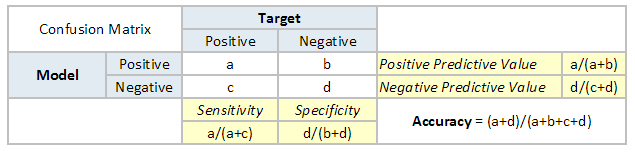

# **IV. Tehnici de optimizare a modelelor**

## **1. Train-Validation-Test split**

### **Teorie**

#### **De ce împărțim setul de date?**

* Nu dorim ca modelul ales să învețe în exces din datele de antrenament și să aibă rezultate slabe după ce a fost implementat în producție. Trebuie să avem un mecanism pentru a evalua cât de bine generalizează modelul ales. Prin urmare, trebuie să separam datele de intrare în subseturi de antrenare, validare și testare pentru a preveni overfitting-ul modelului și pentru a  evalua în mod eficient modelul.

* Împărțirea Train-Validation-Test este o tehnică de evaluare a performanței modelului de învățare automată - clasificare sau regresie deopotrivă. Luam un anumit set de date și îl împărțiți în trei subseturi.

* **ANTRENARE**

  * Set de date utilizate pentru învățare (de către model), adică pentru a potrivi parametrii modelului de ML.

* **VALIDARE**

  * Set de date folosit pentru a oferi o evaluare imparțială a unui model montat pe setul de date de antrenament în timp ce ajustați hiperparametrii modelului.
De asemenea, joacă un rol în alte forme de pregătire a modelului, cum ar fi selecția caracteristicilor, selecția limitei de prag.

* **TESTARE**

  * Set de date folosit pentru a oferi o evaluare imparțială a unui model final montat pe setul de date de antrenament.

#### **Modalitati de impartire a setului de date?**

##### **Random**

* Eșantionarea aleatorie este cea mai veche și mai populară metodă de împărțire a unui set de date. După cum sugerează și numele, setul de date este amestecat, iar mostrele sunt selectate aleatoriu și introduse în antrenare, validare sau setul de testare pe baza raportului procentual dat de utilizator.

* Cu toate acestea, această metodă are un dezavantaj semnificativ. Eșantionarea aleatorie funcționează optim pe seturi de date echilibrate pe clasă, adică seturi de date cu mai mult sau mai puțin același număr de mostre în fiecare categorie de seturi de date. În cazul seturilor de date dezechilibrate de clasă, o astfel de metodă de împărțire a datelor poate crea o prejudecată.

* De exemplu, dacă un set de date are 1000 de imagini, dintre care 800 aparțin categoriei: „câine” și 200 aparțin categoriei: „pisică”, eșantionarea aleatorie este utilizată pentru a împărți datele în seturi de instruire și validare într-un interval de 80% - Raport de 20% (respectiv), s-ar putea întâmpla ca setul de antrenament să conțină doar imagini de câini, în timp ce setul de validare să fie format doar din imagini de pisici. Chiar dacă nu este atât de extrem, va exista totuși o distribuție dezechilibrată.

##### **Stratificat**

* Eșantionarea stratificată pentru împărțirea unui set de date ameliorează problema eșantionării aleatorii în seturile de date cu o distribuție de clasă dezechilibrată. Aici, distribuția claselor în antrenare, validare și seturi de testare este păstrată.

* Să presupunem că un set de date este format din 1000 de imagini, dintre care 600 sunt imagini cu câini și 400 sunt imagini cu pisici. În acest caz, eșantionarea stratificată asigură că 60% dintre imagini sunt de categoria „câine” și 40% sunt de categoria „pisică” în seturile de instruire și validare. Adică, dacă se dorește o împărțire de validare a trenului de 80%-20%, din cele 800 de imagini din setul de antrenament, 480 de imagini (60%) vor fi de câini, iar restul 320 (40%) vor fi de pisici.

* Să luăm în considerare un alt exemplu. În sarcinile de detectare a obiectelor, imaginile individuale pot conține mai multe obiecte diferite aparținând unor categorii disparate. Într-un set de date, unele imagini pot conține 10 exemple de câine, dar doar 1 exemplu de persoană, în timp ce altele pot conține 10 persoane și 2 câini, iar alta poate conține 5 pisici și 5 câini, fără oameni. În astfel de cazuri, o împărțire aleatorie a imaginilor poate modifica distribuția pe categorii de obiecte. Pe de altă parte, eșantionarea stratificată poate partiționa datele astfel încât distribuția categoriei de obiecte rezultată să fie echilibrată.

* Eșantionarea stratificată este o modalitate mai adecvata de împărțire a datelor, astfel încât modelul de învățare automată să fie antrenat și evaluat pe aceeași distribuție a datelor.

##### **Cross Validation**



### **EXEMPLU**

In [ ]:
from matplotlib.axis import YAxis
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets 


iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target


print(iris)



print("-------------- RANDOM ------------------")
# In the first step we will split the data in training and remaining dataset
train_size=0.8
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=train_size, random_state=100, shuffle=True)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=test_size, random_state=100, shuffle=True)

print("====================")
# print("\X_train:\n")
# print(X_train.head())
# print(X_train.shape)

print("\y_train:\n")
# print(y_train.head())
print(y_train.shape)
plt.hist(y_train, 10)
plt.show()

print("====================")
# print("\X_valid:\n")
# print(X_valid.head())
# print(X_valid.shape)
print("\y_valid:\n")
# print(y_valid.head())
print(y_valid.shape)
plt.hist(y_valid, 10)
plt.show()

print("====================")
# print("\X_test:\n")
# print(X_test.head())
# print(X_test.shape)
print("\y_test:\n")
# print(y_test.head())
print(y_test.shape)
plt.hist(y_test, 10)
plt.show()


print("-------------- STRATIFIED ------------------")


# In the first step we will split the data in training and remaining dataset
train_size=0.8
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=train_size, random_state=0, stratify=y)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=test_size, random_state=0, stratify=y_rem)

print("====================")
# print("\X_train:\n")
# print(X_train.head())
# print(X_train.shape)

print("\y_train:\n")
# print(y_train.head())
print(y_train.shape)
plt.hist(y_train, 10)
plt.show()

print("====================")
# print("\X_valid:\n")
# print(X_valid.head())
# print(X_valid.shape)
print("\y_valid:\n")
# print(y_valid.head())
print(y_valid.shape)
plt.hist(y_valid, 10)
plt.show()

print("====================")
# print("\X_test:\n")
# print(X_test.head())
# print(X_test.shape)
print("\y_test:\n")
# print(y_test.head())
print(y_test.shape)
plt.hist(y_test, 10)
plt.show()


## **2. K-Fold Cross validation**

#### **Teorie**

* Validarea încrucișată k-fold este una dintre cele mai populare strategii utilizate pe scară largă de oamenii de știință ai datelor. Este o strategie de partiționare a datelor, astfel încât să puteți utiliza eficient setul de date pentru a construi un model mai generalizat. Intenția principală de a face orice tip de învățare automată este de a dezvolta un model mai generalizat, care poate funcționa bine pe date nevăzute. Se poate construi un model perfect pe datele de antrenament cu o precizie de 100% sau 0 eroare, dar este posibil să nu generalizeze pentru datele nevăzute. Deci, nu este un model bun. Depășește datele de antrenament. Învățarea automată se referă la generalizare, ceea ce înseamnă că performanța modelului poate fi măsurată numai cu puncte de date care nu au fost niciodată folosite în timpul procesului de instruire. De aceea, adesea ne împărțim datele într-un set de antrenament și un set de testare.

* **Procesul general de validare încrucișată k-fold pentru evaluarea performanței unui model este**:

  * Întregul set de date este împărțit aleatoriu în k-folds independente fără înlocuire.

  * Foldurile k-1 sunt folosite pentru antrenamentul modelului și un fold este folosit pentru evaluarea performanței.

  * Această procedură se repetă de k ori (iterații), astfel încât să obținem k număr de estimări de performanță (de exemplu, MSE(Mean Squared Error)) pentru fiecare iterație.

  * Apoi obținem media a numărului k de estimări de performanță (de exemplu, MSE).

* **Observație 1**: Procesul de divizare se face fără înlocuire. Deci, fiecare observație va fi folosită pentru antrenament și validare exact o dată.

* **Observația 2**: Valorile standard bune pentru k în validarea încrucișată de k ori sunt 5 și 10. Cu toate acestea, valoarea lui k depinde de dimensiunea setului de date. Pentru seturi de date mici, putem folosi valori mai mari pentru k. Cu toate acestea, valori mai mari ale lui k vor crește, de asemenea, durata de rulare a algoritmului de validare încrucișată și costul de calcul.

* **Observația 3**: Când k=5, 20% din setul de testare este reținut de fiecare dată. Când k=10, 10% din setul de test este reținut de fiecare dată și așa mai departe...

* **Observația 4**: Un caz special de validare încrucișată de k ori este metoda de validare încrucișată Leave-one-out (LOOCV) în care setăm k=n (numărul de observații din setul de date). Numai un eșantion de antrenament este utilizat pentru testare în timpul fiecărei iterații. Această metodă este foarte utilă atunci când lucrați cu seturi de date foarte mici.

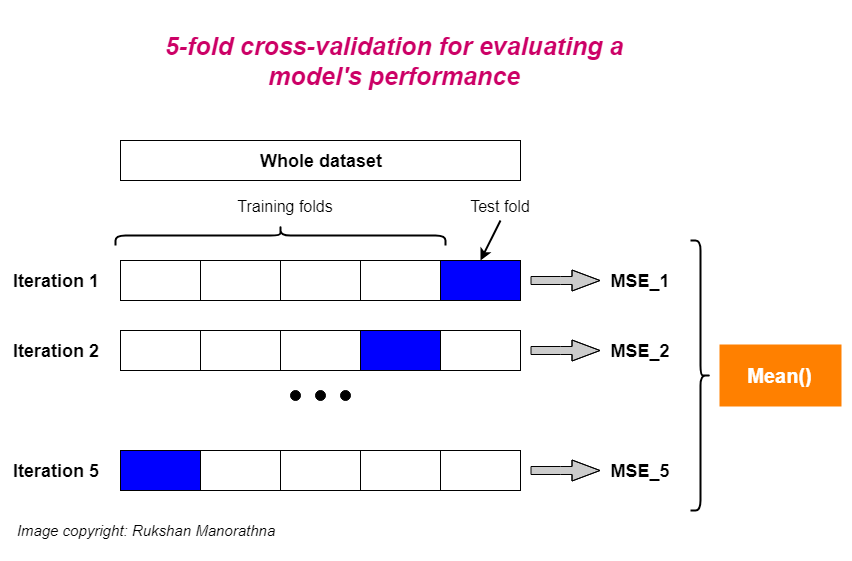

#### **EXEMPLU**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
accuaracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuaracies.mean()*100))
print("Standard deviation: {:.2f} %".format(accuaracies.std()*100))

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## **3. Grid search**

### **Teorie**

* Un hiperparametru de model este o caracteristică a unui model care este externă modelului și a cărui valoare nu poate fi estimată din date. Valoarea hiperparametrului trebuie setată înainte de începerea procesului de învățare. De exemplu, c în Support Vector Machines, k în k-Nearest Neighbors, numărul de straturi ascunse în Neural Networks.

* În schimb, un parametru este o caracteristică internă a modelului și valoarea acestuia poate fi estimată din date. Exemplu, coeficienți beta de regresie liniară/logistică sau vectori suport în mașini de vectori suport.

* **GRID SEARCH** este folosită pentru a găsi hiperparametrii optimi ai unui model care are ca rezultat cele mai „precise” predicții.

### **EXEMPLU**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, C=0.5, gamma=0.6)
classifier.fit(X_train, y_train)
#Best Parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [ 
               {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']} ,
               {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]} 
             ]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## **4. Data leakage discussion**

* Este una dintre principalele erori de învățare automată. Scurgerea de date în învățarea automată are loc atunci când datele pe care suntem obișnuiți să antrenăm un algoritm de învățare automată au informațiile pe care modelul încearcă să le prezică, ceea ce are ca rezultate de predicție nesigure și proaste după implementarea modelului.

* În termeni simpli, pierderea datelor are loc atunci când datele utilizate în procesul de instruire conțin informații despre ceea ce modelul încearcă să prezică. Pare a fi „înșelăciune”, dar din moment ce nu suntem conștienți de asta, este mai bine să o numim „scurgere” în loc să înșeli. Prin urmare, scurgerea de date este o problemă serioasă și larg răspândită în mineritul de date și învățarea automată, care trebuie gestionată bine pentru a obține un model predictiv robust și generalizat.

* **Cum se detectează scurgerile de date? Să luăm în considerare următoarele trei cazuri pentru a detecta scurgerile de date:**

  * **Cazul 1:**
În general, dacă vedem că modelul pe care îl construim este prea bun pentru a fi adevărat (adică oferă rezultate prezise și reale la fel), atunci ar trebui să fim suspicioși și scurgerea de date nu poate fi exclusă. La acel moment, modelul ar putea să memoreze cumva relațiile dintre caracteristică și țintă în loc să învețe și să le generalizeze pentru datele nevăzute. Prin urmare, se recomandă ca înainte de testare, rezultatele documentate anterior să fie cântărite în raport cu rezultatele așteptate.

  * **Cazul-2:**
În timpul **Exploratory Data Analysis (EDA)**, este posibil să detectăm caracteristici care sunt foarte corelate cu variabila țintă. Desigur, unele caracteristici sunt mai corelate decât altele, dar o corelație surprinzător de mare trebuie verificată și tratată cu atenție. Ar trebui să acordăm o atenție deosebită acestor caracteristici. Deci, cu ajutorul EDA, putem examina datele brute prin instrumente statistice și de vizualizare.

  * **Cazul-3:**
După finalizarea antrenarii modelului, dacă caracteristicile au greutăți foarte mari, atunci ar trebui să acordăm o atenție deosebită. Aceste caracteristici ar putea avea scurgeri.

* **Cum să prevenim scurgerea de date:**

  * 1. Eliminarea feature-urile care au o corelatie puternica cu varibilele targetate.
  * 2. Crearea separată a unui set de date de validare.
  * 3. Aplicarea separată a preprocesării datelor între datele de antrenare și cele de testare. (EX: normalizarea)
  * 4. Cross-Validation

# **V. Optimizarea modelelor cunoscute**

## **1. Regresie**

In [ ]:
import numpy as np
import pandas as pd 

df = pd.read_csv("hour.csv")
df = df.drop(['dteday'], axis=1)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                   test_size=0.20, random_state=42)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf = RandomForestRegressor(n_estimators=100, criterion="mse",
                           bootstrap=True, oob_score=True, n_jobs=10,
                           random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', mape * 100, 2)
print('Accuracy:', 100*(1 - mape), 2)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, criterion="mse",
                           bootstrap=True, oob_score=True, n_jobs=10,
                           random_state=42)

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[None,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'max_features':['auto','sqrt','log2']}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf, param_grid=hyperparameter_space , 
                  scoring="neg_mean_squared_error",
                  n_jobs=10, cv=5, return_train_score=True)

gs.fit(X_train, y_train)
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated MSE or training score of the best_estimator: ",
       np.sqrt(-gs.best_score_))
gs.best_estimator_.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', mape * 100, 2)
print('Accuracy:', 100*(1 - mape), 2)

## **2. Clasificare**

In [ ]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('breast_cancer.csv', header=None)
data.columns = ['Sample Code Number','Clump Thickness','Uniformity of Cell Size',
                                                        'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                                                        'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

data = data.iloc[1: , :]
data.head(10)

In [ ]:
data = data.drop(['Sample Code Number'],axis=1) #Drop 1st column
data = data[data['Bare Nuclei'] != '?'] #Remove rows with missing data
print(data['Class'].dtypes)
data['Class'].value_counts() #Class distribution
print(data['Class'])

data['Class'] = data['Class'].astype(int)

new_collumn = []
for class_item in data['Class']:
  if class_item == 2:
    new_collumn.append(0)
  elif class_item == 4:
    new_collumn.append(1)
  else:
    new_collumn.append(class_item)
data['Class'] = new_collumn 


data['Class'].value_counts() #Class distribution

In [ ]:
#Split data into attributes and class
X = data.drop(['Class'],axis=1)
y = data['Class']

#perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Dummy Classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred = clf.predict(X_test)

#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

In [ ]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print("Best hyperparameters: " + str(grid_clf_acc.best_params_))
print("Best score: " + str(grid_clf_acc.best_score_))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

## **3. Clusterizare**

In [ ]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

In [ ]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [ ]:
data[continuous_features].describe()

In [ ]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

In [ ]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# k = 5 este optimul

# **VI. Exerciții**

## **[30p] Exercitiul 1 - REGRESIE** Rezolvati datasetul **The Boston Housing Dataset (load_boston())** urmarind pasii de mai jos (de uilizat alta regresie invatata la laborator, alta decat cea folosita in exemplul de mai sus):

### **Task 1** - Importul bibliotecilor

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.datasets import load_boston

### **Task 2** - Importul setului de date

In [ ]:
dataset = load_boston()
X = load_boston()['data'].copy()
y = load_boston()['target'].copy()

dataset.keys()
print(dataset['DESCR'])

# create a dataframe
dataset = pd.DataFrame(dataset.data, columns=dataset.feature_names)

### **Task 3** - Preprocesarea datelor

In [ ]:
dataset.isnull().sum()

# no missing values so we continue with splitting the set in train test

### **Task 4** - Împărțirea setului de date în setul de antrenare și testare

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                   test_size=0.25, random_state=42)

### **Task 5** - Alegerea modelului

In [ ]:
# Decision Tree Regression
regressor = DecisionTreeRegressor(random_state = 0) 

### **Task 6** - Antrenarea modelelor pe setul de antrenare

In [ ]:
regressor.fit(X_train, y_train)

### **Task 7** - Prezicerea rezultatelor setului de testare

In [ ]:
y_pred = regressor.predict(X_test)

### **Task 8** - Evaluare modelului



In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', mape * 100, 2)
print('Accuracy:', 100*(1 - mape), 2)

### **Task 9** - Optimizarea modelului



In [ ]:
hyperparameter_space = {'max_depth':(3,4,5,6,7,8)}

gs = GridSearchCV(regressor, param_grid=hyperparameter_space , 
                  scoring="neg_mean_squared_error",
                  n_jobs=10, cv=8, return_train_score=True)

gs.fit(X_train, y_train)
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated MSE or training score of the best_estimator: ",
       np.sqrt(-gs.best_score_))
gs.best_estimator_.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', mape * 100, 2)
print('Accuracy:', 100*(1 - mape), 2)

## **[30p] Exercitiul 2 - CLASIFICARE** Rezolvati datasetul **BankNote_Authentication.csv** (de uilizat alt model de clasificare invatat la laborator, altul decat cel folosit in exemplul de mai sus) urmarind pasii de mai jos:

### **Task 1** - Importul bibliotecilor

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### **Task 2** - Importul setului de date

In [ ]:
data = pd.read_csv('BankNote_Authentication.csv')
data

### **Task 3** - Preprocesarea datelor

In [ ]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

print(X)

### **Task 4** - Împărțirea setului de date în setul de antrenare și testare

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Task 5** - Alegerea modelului

In [ ]:
# Random Forest Classifier
randomForestClassifier = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)

### **Task 6** - Antrenarea modelelor pe setul de antrenare

In [ ]:
randomForestClassifier.fit(X_train, y_train)

### **Task 7** - Prezicerea rezultatelor setului de testare

In [ ]:
y_pred_rfc = randomForestClassifier.predict(X_test)

### **Task 8** - Evaluare modelului



In [ ]:
randomForestClassifierSCore = accuracy_score(y_test, y_pred_rfc)
print("randomForestClassifierSCore = " + str(randomForestClassifierSCore))

### **Task 9** - Optimizarea modelului



In [ ]:
accuaracies = cross_val_score(estimator=randomForestClassifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuaracies.mean()*100))
print("Standard deviation: {:.2f} %".format(accuaracies.std()*100))

## **[40p] Exercitiul 3 - CLASIFICARE** Rezolvati datasetul **abalone.csv** (de uilizat altamodel de clasificare invatat la laborator, altul decat cel folosit in exemplul de mai sus si in exercitul anterior) urmarind pasii de mai jos:

### **Task 1** - Importul bibliotecilor

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from  sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### **Task 2** - Importul setului de date

In [ ]:
data = pd.read_csv('abalone.csv')
data

### **Task 3** - Preprocesarea datelor

In [ ]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

print(X)
print(y)

### **Task 4** - Împărțirea setului de date în setul de antrenare și testare

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Task 5** - Alegerea modelului

In [ ]:
# Decision Tree
decisionTreeClassifier = DecisionTreeClassifier()

### **Task 6** - Antrenarea modelelor pe setul de antrenare

In [ ]:
decisionTreeClassifier.fit(X_train, y_train)

### **Task 7** - Prezicerea rezultatelor setului de testare

In [ ]:
y_pred = decisionTreeClassifier.predict(X_test)

### **Task 8** - Evaluare modelului



In [ ]:
decisionTreeClassifierScore = accuracy_score(y_test, y_pred)
print("decisionTreeClassifierScore = " + str(decisionTreeClassifierScore))

### **Task 9** - Optimizarea modelului



In [ ]:
accuaracies = cross_val_score(estimator=decisionTreeClassifier, X=X_train, y=y_train, cv=5)
print("Accuracy: {:.2f} %".format(accuaracies.mean()*100))
print("Standard deviation: {:.2f} %".format(accuaracies.std()*100))

# **Referințe**

* https://www.geeksforgeeks.org/ml-r-squared-in-regression-analysis/

* https://www.analyticsvidhya.com/blog/wp-content/uploads/2015/01/Confusion_matrix.png

